## Correr el encabezado antes de comenzar para cargar todas las funiones

In [3]:
#Encabezado del archivo
import os,csv
import pandas as pd
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
%matplotlib inline

def cargar_txt_en_lista(file_path):
    return_list = []
    with open(file_path,"r") as openfile:
        for lines in openfile:
            return_list.append(lines.replace("\n",""))
            
    return return_list

#Filtros de String para dataframe
#Variante para una columna

def sfilter_by_col(df_query,col_name,text,has=True):
    df_return = df_query.loc[df_query[col_name].str.contains(text)==has]
    return df_return

def sfilter_linage(df_query,text,has=True):
    df_return = df_query.loc[df_query["Linage"].str.contains(text)==has]
    return df_return


def sfilter_org(df_query,text,has=True):
    df_return = df_query.loc[df_query["Organism"].str.contains(text)==has]
    return df_return

def sfilter_by_uniprot(df_query,uniprot_query):
    df_return =  df_query.loc[df_query["UNIPROT_ID"]==uniprot_query]
    return df_return


def get_pdb_list_from_df(df_query,uniprot_query):
    df_return =  df_query.loc[df_query["UNIPROT_ID"]==uniprot_query]
    return_list = filter_by_uniprot(df_proteins_celular,"P04637").iloc[0]["PDB_CHAIN_LIST"]
    return return_list

def printd(text):
    display(Markdown(text))
    return

def strlen(x):
    return str(len(x))

def check_not_None(thing):
    if type(thing) != type (None):
        return True
    else:
        return False


printd("### Funciones cargagadas correctamente, puede continuar.")

### Funciones cargagadas correctamente, puede continuar.

# Correr el main para generar el Informe Base



# Fercha del informe 2019-09-27

## Reading swissprot

Dataframe size: 560459

,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs
0,Q0ATK2,ACCD_MARMM,reviewed,Acetyl-coenzyme A carboxylase carboxyl transfe...,accD Mmar10_0089,Maricaulis maris (strain MCS10),311,"cellular organisms, Bacteria, Proteobacteria, ...",MTEKSNGMSWLSKITPPGMSKIFSKRDTPDNLWVKCPVSEEMVFHK...,394221
1,O40976,1A_CMVNT,reviewed,Replication protein 1a [Includes: ATP-dependen...,ORF1a,Cucumber mosaic virus (strain NT9) (CMV),993,"Viruses, Riboviria, Bromoviridae, Cucumovirus,...",MATSSFNINELVASHGDKGLLATALVDKTAHEQLEEQLQHQRRGRK...,117124
2,Q84P24,4CLL6_ARATH,reviewed,4-coumarate--CoA ligase-like 6 (EC 6.2.1.-) (4...,4CLL6 At4g19010 F13C5.180,Arabidopsis thaliana (Mouse-ear cress),566,"cellular organisms, Eukaryota, Viridiplantae, ...",MAATHLHIPPNPKTQTSHQNPPFWFSSKTGIYTSKFPSLHLPVDPN...,3702
3,P62260,1433E_RAT,reviewed,14-3-3 protein epsilon (14-3-3E) (Mitochondria...,Ywhae,Rattus norvegicus (Rat),255,"cellular organisms, Eukaryota, Opisthokonta, M...",MDDREDLVYQAKLAEQAERYDEMVESMKKVAGMDVELTVEERNLLS...,10116
4,P0CK20,A25_VACCC,reviewed,Protein A2.5,A2.5L,Vaccinia virus (strain Copenhagen) (VACV),76,"Viruses, Poxviridae, Chordopoxvirinae, Orthopo...",MSWYEKYNIVLNPPKRCSSACADNLTTILAEDGNHIRAILYSQPKK...,10249


## Reading PDBSWS

swslist dataframe size: 47097

,UNIPROT_ID,PDB_CHAIN_LIST,pdb_chain_count
0,A0A010,"[5B00_A, 5B00_B, 5B00_C, 5B01_A, 5B01_B, 5B01_...",57
1,A0A011,"[3VK5_A, 3VK5_B, 3VKA_A, 3VKA_B, 3VKB_A, 3VKB_...",10
2,A0A585,[4MNQ_E],1
3,A0A5A3,"[4UDT_B, 4UDU_B]",2
4,A0A5B3,"[5NHT_B, 5NQK_B]",2


# Merge Sprot with SWS

Dataframe size: 26550

,Length,Taxonomic lineage IDs,pdb_chain_count
count,26550.000000,2.655000e+04,26550.000000
mean,454.547081,1.216896e+05,10.030245
std,545.239279,1.946628e+05,30.223010
min,5.000000,1.700000e+01,1.000000
25%,188.000000,9.606000e+03,2.000000
50%,328.000000,1.009000e+04,4.000000
75%,529.000000,2.089640e+05,8.000000
max,34350.000000,2.510777e+06,1084.000000


# Resumen de informacion del conjunto de proteinas a estudiar

Viruses Dataframe size: 567

Celular Dataframe size: 10165

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Bacteria dataframe size: 3694

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Archaea dataframe size: 418

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Eukaryota dataframe size: 6053

# Graficos del dataframe de trabajo( Organismos Celulares)

## Histograma de Length menores a 3000

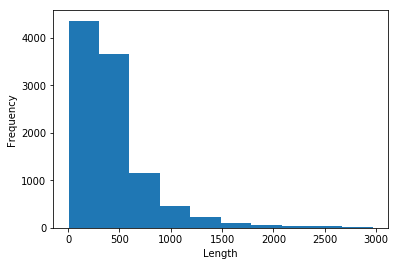

## Histograma de pdb_chain_count menores a 200

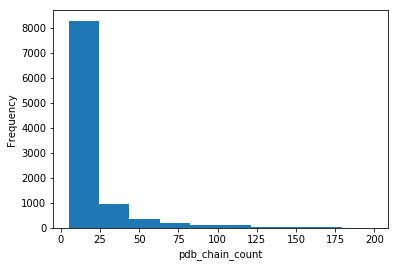

informe generado en 8.854356527328491

In [4]:
import time,datetime
# MAIN/CARGA DE DATOS
printd("# Fercha del informe "+str(datetime.date.today()))
tiempo_inicial = time.time()

log_error = dict()
log_error["SWISPROT"] = list()
log_error["PDBSWS_PDBUNIPROT"] = list()

# paths de archivos iniciales
path_swissprot_tab =  "bases_de_datos_ref/uniprot-reviewed_20190730.tab"
path_pdbwsw_pdbchain = "bases_de_datos_ref/pdb_uniprot_chain_map.lst.2"


#CARGAR SWISSPROT
printd ("## Reading swissprot")

df_sprot = pd.read_csv(path_swissprot_tab,sep="\t")
df_sprot.columns = ['UNIPROT_ID', 
                    'Entry_name', 
                    'Status', 
                    'Protein_names', 
                    'Gene names', 
                    'Organism', 
                    'Length', 'Linage', 
                    'Sequence', 
                    'Taxonomic lineage IDs']
printd("Dataframe size: "+strlen(df_sprot))
display(df_sprot.head(n=5))


#ESTE BLOQUE SIRVE PARA CARGAR SIFTS, 
#actualmente no esta en uso
#
"""
printd ("## Reading sitfs")
df_sifts = pd.read_csv("bases_de_datos_ref/sifts_uniprot_pdb.tsv",header=1,sep="\t")
df_sifts.columns = ["UNIPROT_ID","PDB_list_sifts"]
printd("Dataframe size: "+strlen(df_sifts))
display(df_sifts.head(n=5))

printd ("Merge sprot with sifts")
df_sprot_pdb = pd.merge(df_sprot,df_sifts,on=["UNIPROT_ID"],how="inner")
printd("Dataframe size: "+strlen(df_sprot_pdb))
display(df_sprot_pdb.head(n=1))
"""

###CARGAR PDBSWS
printd ("## Reading PDBSWS")
#Esto carga la lista manualmente por que algunos codigos uniprot no figuran.
#son listas de ancho fijo (ej: '101m A P02185')
#algunas lineas del archivo 
lst_pdbsws = []
tmp_pdbsws = cargar_txt_en_lista(path_pdbwsw_pdbchain)
for index,line in enumerate(tmp_pdbsws):
    if (line[-1] != "?") and (line[-1] != " "):
        pdb_chain_id = line[0:4].upper()+"_"+line[5] 
        tmp = [pdb_chain_id,line[0:4],line[5],line[7:]]
        lst_pdbsws.append(tmp)
    else:
        #Los errores de carga de archivos se anexan a su log
        message = "Error in line "+ str(index) + ": "+ (line) 
        log_error["PDBSWS_PDBUNIPROT"].append(message)
#Borrar vbariables
del pdb_chain_id
del tmp_pdbsws
del tmp
#Crea el dataframe usando la lista
df_pdbsws = pd.DataFrame(lst_pdbsws).dropna()
df_pdbsws.columns = ["PDB_CHAIN_ID","PDB","CHAIN","UNIPROT_ID"]
#Los agrupa por pdb
df_swslist = df_pdbsws.groupby(["UNIPROT_ID"],as_index=False).agg({'PDB_CHAIN_ID':lambda x:list(x)})
#Agrega el numero de pdbs en la lista
df_swslist["pdb_chain_count"] = df_swslist.apply({"PDB_CHAIN_ID":lambda x: len(x)})
df_swslist.columns= ["UNIPROT_ID","PDB_CHAIN_LIST" ,"pdb_chain_count"]
#Informe visible
printd ("swslist dataframe size: "+strlen(df_swslist))
display(df_swslist.head())

### MERGE: AGREGA las columnas de sws a sprot, elimina los uniprot que no tengan mapeo.
printd ("# Merge Sprot with SWS")
df_sprot_pdb = pd.merge(df_sprot,df_swslist,on=["UNIPROT_ID"],how="inner")
printd("Dataframe size: "+strlen(df_sprot_pdb))
display(df_sprot_pdb.describe())

### FILTRANDO
# De las proteinas con mas de 5 cadenas, 
# Separar los virus en una tabla aparte.
df_work = df_sprot_pdb.loc[(df_sprot_pdb["pdb_chain_count"]>4) & (df_sprot_pdb["Linage"].str.contains("Viruses")==False)]
df_virus = df_sprot_pdb.loc[(df_sprot_pdb["pdb_chain_count"]>4) & (df_sprot_pdb["Linage"].str.contains("Viruses"))]
printd ("# Resumen de informacion del conjunto de proteinas a estudiar")
printd ("Viruses Dataframe size: "+strlen(df_virus) )
printd ("Celular Dataframe size: "+strlen(df_work))
for taxa in ["Bacteria","Archaea","Eukaryota"]:
    printd ("&nbsp;"*6+taxa+" dataframe size: "+strlen (sfilter_linage(df_work,taxa)))

printd("# Graficos del dataframe de trabajo( Organismos Celulares)")

printd("## Histograma de Length menores a 3000")
plot_his1 = df_work["Length"].loc[df_work["Length"]<3000].plot(kind="hist")
plot_his1.set_xlabel("Length")
plt.show()


printd("## Histograma de pdb_chain_count menores a 200")
plot_his2 = df_work["pdb_chain_count"].loc[df_work["pdb_chain_count"]<200].plot(kind="hist")
plot_his2.set_xlabel("pdb_chain_count")
plt.show()

printd( "informe generado en "+str(time.time()-tiempo_inicial))


#Esta linea guarda el df_work en un archivo tsv
df_work.to_csv("archivos_importantes/df_work_"+str(datetime.date.today())+".tsv",sep="\t")

# Guardar en archivo

In [7]:
#Esto arma una lista global de pdb en el df_work
def update_pdb_dowladed(dataframe):
    for i,row in dataframe.iterrows():
        filename = "ent_files/pdb"+row[0].lower()+".ent"
        if os.path.isfile (filename):
            dataframe.at[i,"dowloaded"] = True
            dataframe.at[i,"path_to_entfile"] = filename
    return

full_pdb_list = set()
for lines in df_work["PDB_CHAIN_LIST"]:
    full_pdb_list.update(set([x[0:4] for x in lines]))

df_full_pdb = pd.DataFrame(list(full_pdb_list))
df_full_pdb.columns = ["PDB_ID"]
df_full_pdb["dowloaded"] = False
df_full_pdb["path_to_entfile"] = None
printd ("PDB LIST is "+strlen(df_full_pdb))
display(df_full_pdb.head())

update_pdb_dowladed(df_full_pdb)

df_full_pdb.loc[df_full_pdb["dowloaded"]==True]

PDB LIST is 82289

,PDB_ID,dowloaded,path_to_entfile
0,2FYN,False,None
1,2CAN,False,None
2,5KIJ,False,None
3,2F1A,False,None
4,2D7Y,False,None


,PDB_ID,dowloaded,path_to_entfile
1122,4IBW,True,ent_files/pdb4ibw.ent
1350,1SAL,True,ent_files/pdb1sal.ent
1860,1KZY,True,ent_files/pdb1kzy.ent
1887,3KZ8,True,ent_files/pdb3kz8.ent
1938,4AGO,True,ent_files/pdb4ago.ent
2764,2J21,True,ent_files/pdb2j21.ent
3048,2BIQ,True,ent_files/pdb2biq.ent
3122,2KS1,True,ent_files/pdb2ks1.ent
3589,2MZD,True,ent_files/pdb2mzd.ent
3924,2N0A,True,ent_files/pdb2n0a.ent


In [15]:
#Checkquer estructura de carpetas
folder_list = ["ent_files","fasta","blast","pdb_chains","cd-hit-results-0.95","cd-hit-results-0.80","tree"]
print ("Checking folder structure.")
for folder in folder_list:
    if not os.path.isdir(folder):
        print ("Creating folder "+ folder)
        os.mkdir(folder)



#Crea un diciconario para acumular los datos a usar
#crea un diccionario que contiene dataframes especificos utiles
#las llaves son los uniprot_id.

def sort_cdhitcluster(list_query):
    return sorted(list_query,key = lambda x: x[2],reverse=True)

def dibujar_histograma(df_query,col):
    plot_his1 = df_query[col].plot(kind="hist")
    plot_his1.set_xlabel(col)
    plt.show()
    return

def show_ensemble_info(query):
    printd("## Mostrando datos de la proteina de estudio")
    for entry in ensemble_data[query]:
        printd ("&nbsp;&nbsp;**"+entry+"** >"+ "`"+str(ensemble_data[query][entry])+"`")
    return

def run_blast(fasta_file):
    output_filename = fasta_file.replace("fasta/","blast_results/").replace(".fasta","_blast_results.txt")
    cmd = "blastp -query "+ fasta_file +" -db uniprot_sprot.db -evalue 1e-10 -out "+ output_filename +" -outfmt '6 qaccver qlen qstart qend sseqid saccver slen sstart send length staxid nident gaps evalue pident qcovs' -num_alignments 1000"
    os.system(cmd)
    return output_filename


#el imput es el fasta con los homologos, el coef tiene que ser un string.
def cdhit_stuff(filename_hsf,coef):
    outfile_cdhit =  filename_hsf.replace("fasta/homologs_sprot/","cd-hit-results-"+coef+"/").replace("_homologs_sprot.fasta","_cd-hit")
    
    #si el archivo no existe, corre el cdhit
    if not os.path.isfile(outfile_cdhit):
        cmd = "cd-hit -i " + filename_hsf + " -o " + outfile_cdhit + " -c "+coef
        os.system(cmd)
        
    outfile_cdhit = outfile_cdhit+".clstr"
    #parsea los resultados del cdhit
    clusters = dict()    
    if os.path.isfile(outfile_cdhit):
        with open(outfile_cdhit,"r") as openfile:
            for line in openfile:
                text = line.replace("\n","")
                if text[0] == ">":
                    clus_num = (text[1:])
                    clusters[clus_num] = list()
                if text[0] in [str(x) for x in range(0,10)]:
                    uniprot_id =  (text.split(">")[1][0:6])
                    rep = int ("*" in text.split(">")[1])
                    if rep == False:
                        at_percent = float(text.split("at ")[1].replace("%",""))
                    else:
                        at_percent = float("100.00")
                    clusters[clus_num].append( [uniprot_id,bool(rep),at_percent])
        for cluster_n in clusters:
            clusters[cluster_n] = sort_cdhitcluster(clusters[cluster_n])
        return outfile_cdhit,clusters
    else:
        return "N/A","N/A"

def make_fasta_from_list(query,query_list,outfilename):
    with open(outfilename,"w") as openfile:
            openfile.write(">"+query)
            openfile.write("\n")
            openfile.write(ensemble_data[query]["Sequence"])
            openfile.write("\n")
            for uniprot_id in query_list:
                #Si la secuencia esta en el dataframe de sprot
                if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id])>0:
                    seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id]["Sequence"].iloc[0]
                    openfile.write(">"+uniprot_id)
                    openfile.write("\n")
                    openfile.write(seq)
                    openfile.write("\n")
    return outfilename


def get_cdhit_rep(uniprot_query,coef="0.95"):
    cluster_rep_list = []
    for cluster in ensemble_data[uniprot_query]["cd-hit-results-"+coef+"_parsed"]:
        for members in ensemble_data[uniprot_query]["cd-hit-results-"+coef+"_parsed"][cluster]:
            if members[1] == True:
                uniprot_id = members[0]
                df1 = ensemble_df[uniprot_query]["blast_results"]
                if len(df1.loc[df1["UNIPROT_ID"]==uniprot_id]["pident"] ) != 0:
                    ident_val = max(df1.loc[df1["UNIPROT_ID"]==uniprot_id]["pident"])
                    cluster_rep_list.append((members[0],ident_val))
                else:
                    ident_val = 0
                    cluster_rep_list.append((members[0],ident_val))
    return cluster_rep_list    
    

ensemble_data = dict()
ensemble_df = dict()
#esta es la funcion importante
def estudiar_proteina(query,show=True):
    #Check que el query sea correcto
    if not query in list(df_work["UNIPROT_ID"]):
        print ("La proteina solicitada no se encuentra disponible.")
        return False
    
    #premite la escritura en las variables globales
    global ensemble_data
    global ensemble_df
    
    #carga informacion en ensemble_data y ensemble_df
    ensemble_df[query] = dict()
    ensemble_data[query] = dict(sfilter_by_uniprot(df_work,query).iloc[0])
    #da una lista 
    ensemble_data[query]["PDB_in_df_work"] = (list(set([x[0:4] for x in ensemble_data[query]["PDB_CHAIN_LIST"]])))

    #create fasta file with query seq
    with open ("fasta/"+query+".fasta","w") as openfile:
        openfile.write (">"+query+"\n")
        openfile.write (ensemble_data[query]["Sequence"]+"\n")
    
    #BUSCAR RESULTADOS DEL BLAST, SI NO EXISTEN, CORRERLO
    blast_results_filename = "blast_results/"+query+"_blast_results.txt"
    if os.path.isfile(blast_results_filename):
        if os.path.getsize(blast_results_filename) == 0:
            if show: print ("R ",end="")
            os.system("rm "+blast_results_filename)
            ensemble_data[query]["blast_results"] = run_blast("fasta/"+query+".fasta")
        else:
            ensemble_data[query]["blast_results"] = blast_results_filename
    else:
        ensemble_data[query]["blast_results"] = run_blast("fasta/"+query+".fasta")
    
    
    #PARSEAR LOS RESULTADOS EL BLAST y cargarlos a ensemble data
    if os.path.getsize(ensemble_data[query]["blast_results"]) > 0:
        #leer los datos importantes del blast y colocarlos en un dataframe
        df1 = pd.read_csv(ensemble_data[query]["blast_results"],header=None,sep="\t")
        df1.columns = "qaccver qlen qstart qend sseqid saccver slen sstart send length staxid nident gaps evalue pident qcov".split(" ")
        df1["UNIPROT_ID"] =  df1["sseqid"].str.split("|",expand=True)[1]
        #se agregan los valores de qstart y qend
        df2 = df1[["UNIPROT_ID","pident","qcov","qstart","qend","sstart","send","gaps"]].loc[(df1["UNIPROT_ID"]!=query) & (df1["pident"]>30) & (df1["qcov"]>75) ]
        
        #esta linea elimina los resultados repetidos en el blast y se queda solo con el primer hit.
        ensemble_df[query]["blast_results"] = df2.drop_duplicates(["UNIPROT_ID"])
        del df1,df2
        #carga la infomacion de los homologos al ensemble_data
        ensemble_data[query]["homologs_sprot"] = list(set(list(ensemble_df[query]["blast_results"]["UNIPROT_ID"])))
        ensemble_data[query]["homologs_in_df_work"] = list(set(df_work["UNIPROT_ID"]) & set(ensemble_data[query]["homologs_sprot"]))
    else:
        ensemble_data[query]["homologs_sprot"] = []
        if show: printd("## Alerta, blast_results still 0 "+query)    

        return False
    
    if len( ensemble_data[query]["homologs_sprot"])< 20:
        return False
    
    #CREAR FASTA DE HOMOLOGOS
    filename_hsf = "fasta/homologs_sprot/"+query+"_homologs_sprot.fasta"
    if os.path.isfile(filename_hsf):
        ensemble_data[query]["homologos_sprot_fasta"] = filename_hsf
    else:
        with open(filename_hsf,"w") as openfile:
            openfile.write(">"+query)
            openfile.write("\n")
            openfile.write(ensemble_data[query]["Sequence"])
            openfile.write("\n")
            for homolog in ensemble_data[query]["homologs_sprot"]:
                #Si la secuencia esta en el dataframe de sprot
                if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==homolog])>0:
                    seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==homolog]["Sequence"].iloc[0]
                    openfile.write(">"+homolog)
                    openfile.write("\n")
                    openfile.write(seq)
                    openfile.write("\n")
            ensemble_data[uniprot_id]["homologos_sprot_fasta"] = filename_hsf
    
    #corre el cdhit si el archivo de salida no existe. 
    
    cdhit_results,cdhit_parsed = cdhit_stuff(filename_hsf,"0.95")
    ensemble_data[query]["cd-hit-results-0.95"] = cdhit_results
    ensemble_data[query]["cd-hit-results-0.95_parsed"] = cdhit_parsed
    #Estas lineas hacian el codigo extremadamente lento de decide hacerlo on-demand
    #ensemble_data[query]["cd-hit-results-0.95_fasta"] = make_fasta_from_list(query,[x[0] for x in get_cdhit_rep(query,"0.95")],"fasta/cdhit-0.95/"+query+"_cdhit-0.95.fasta")
    
    cdhit_results,cdhit_parsed = cdhit_stuff(filename_hsf,"0.80")
    ensemble_data[query]["cd-hit-results-0.80"] = cdhit_results
    ensemble_data[query]["cd-hit-results-0.80_parsed"] = cdhit_parsed
    
    
    #ensemble_data[query]["cd-hit-results-0.80_fasta"] = make_fasta_from_list(query,[x[0] for x in get_cdhit_rep(query,"0.80")],"fasta/cdhit-0.80/"+query+"_cdhit-0.80.fasta")
    
    #muestra los resutaldos hasta el momento
    if show:
        show_ensemble_info(query)
        printd("### Histograma de los resultados del blast")
    return True

estudiar_proteina("P04637")


Checking folder structure.


## Mostrando datos de la proteina de estudio

&nbsp;&nbsp;**UNIPROT_ID** >`P04637`

&nbsp;&nbsp;**Entry_name** >`P53_HUMAN`

&nbsp;&nbsp;**Status** >`reviewed`

&nbsp;&nbsp;**Protein_names** >`Cellular tumor antigen p53 (Antigen NY-CO-13) (Phosphoprotein p53) (Tumor suppressor p53)`

&nbsp;&nbsp;**Gene names** >`TP53 P53`

&nbsp;&nbsp;**Organism** >`Homo sapiens (Human)`

&nbsp;&nbsp;**Length** >`393`

&nbsp;&nbsp;**Linage** >`cellular organisms, Eukaryota, Opisthokonta, Metazoa, Eumetazoa, Bilateria, Deuterostomia, Chordata, Craniata, Vertebrata, Gnathostomata (jawed vertebrates), Teleostomi, Euteleostomi, Sarcopterygii, Dipnotetrapodomorpha, Tetrapoda, Amniota, Mammalia, Theria, Eutheria, Boreoeutheria, Euarchontoglires, Primates, Haplorrhini, Simiiformes, Catarrhini, Hominoidea (apes), Hominidae (great apes), Homininae, Homo, Homo sapiens (Human)`

&nbsp;&nbsp;**Sequence** >`MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD`

&nbsp;&nbsp;**Taxonomic lineage IDs** >`9606`

&nbsp;&nbsp;**PDB_CHAIN_LIST** >`['1A1U_A', '1A1U_C', '1AIE_A', '1C26_A', '1DT7_X', '1DT7_Y', '1GZH_A', '1GZH_C', '1H26_E', '1HS5_A', '1HS5_B', '1JSP_A', '1KZY_A', '1KZY_B', '1MA3_B', '1OLG_A', '1OLG_B', '1OLG_C', '1OLG_D', '1OLH_A', '1OLH_B', '1OLH_C', '1OLH_D', '1PES_A', '1PES_B', '1PES_C', '1PES_D', '1PET_A', '1PET_B', '1PET_C', '1PET_D', '1SAE_A', '1SAE_B', '1SAE_C', '1SAE_D', '1SAF_A', '1SAF_B', '1SAF_C', '1SAF_D', '1SAH_A', '1SAH_B', '1SAH_C', '1SAH_D', '1SAJ_A', '1SAJ_B', '1SAJ_C', '1SAJ_D', '1SAK_A', '1SAK_B', '1SAK_C', '1SAK_D', '1SAL_A', '1SAL_B', '1SAL_C', '1SAL_D', '1TSR_A', '1TSR_B', '1TSR_C', '1TUP_A', '1TUP_B', '1TUP_C', '1UOL_A', '1UOL_B', '1YC5_B', '1YCQ_B', '1YCR_B', '1YCS_A', '2AC0_A', '2AC0_B', '2AC0_C', '2AC0_D', '2ADY_A', '2ADY_B', '2AHI_A', '2AHI_B', '2AHI_C', '2AHI_D', '2ATA_A', '2ATA_B', '2ATA_C', '2ATA_D', '2B3G_B', '2BIM_A', '2BIM_B', '2BIN_A', '2BIO_A', '2BIP_A', '2BIQ_A', '2F1X_A', '2F1X_B', '2FEJ_A', '2FOJ_B', '2FOO_B', '2GS0_B', '2H1L_M', '2H1L_N', '2H1L_O', '2H1L_P', '2H1L_Q', '2H1L_R', '2H1L_S', '2H1L_T', '2H1L_U', '2H1L_V', '2H1L_W', '2H1L_X', '2H2D_B', '2H2F_B', '2H4F_D', '2H4H_B', '2H4J_D', '2H59_D', '2H59_E', '2J0Z_A', '2J0Z_B', '2J0Z_C', '2J0Z_D', '2J10_A', '2J10_B', '2J10_C', '2J10_D', '2J11_A', '2J11_B', '2J11_C', '2J11_D', '2J1W_A', '2J1W_B', '2J1X_A', '2J1X_B', '2J1Y_A', '2J1Y_B', '2J1Y_C', '2J1Y_D', '2J1Z_A', '2J1Z_B', '2J20_A', '2J20_B', '2J21_A', '2J21_B', '2K8F_B', '2L14_B', '2LY4_B', '2MEJ_B', '2MWO_B', '2MWP_B', '2MWY_B', '2MZD_B', '2OCJ_A', '2OCJ_B', '2OCJ_C', '2OCJ_D', '2PCX_A', '2QVQ_A', '2QXA_A', '2QXA_B', '2QXA_C', '2QXA_D', '2QXB_A', '2QXB_B', '2QXB_C', '2QXB_D', '2QXC_A', '2QXC_B', '2QXC_C', '2QXC_D', '2RUK_A', '2VUK_B', '2WGX_A', '2WGX_B', '2X0U_A', '2X0U_B', '2X0V_A', '2X0V_B', '2X0W_A', '2X0W_B', '2XWR_B', '2YBG_A', '2YBG_B', '2YBG_C', '2YBG_D', '2YDR_P', '2Z5S_P', '2Z5S_Q', '2Z5T_P', '2Z5T_Q', '2Z5T_R', '3D05_A', '3D06_A', '3D07_A', '3D07_B', '3D08_A', '3D09_A', '3DAC_B', '3IGK_A', '3IGL_A', '3KMD_A', '3KMD_B', '3KMD_C', '3KMD_D', '3KZ8_A', '3KZ8_B', '3LW1_P', '3OQ5_A', '3OQ5_B', '3OQ5_C', '3PDH_D', '3Q01_A', '3Q01_B', '3Q05_A', '3Q05_B', '3Q05_C', '3Q05_D', '3Q06_A', '3Q06_B', '3Q06_C', '3Q06_D', '3SAK_A', '3SAK_B', '3SAK_C', '3SAK_D', '3TG5_B', '3TS8_A', '3TS8_B', '3TS8_C', '3TS8_D', '3ZME_A', '3ZME_B', '4AGL_A', '4AGL_B', '4AGM_A', '4AGM_B', '4AGN_A', '4AGN_B', '4AGO_A', '4AGO_B', '4AGP_A', '4AGP_B', '4AGQ_A', '4AGQ_B', '4BUZ_P', '4BV2_E', '4BV2_H', '4FZ3_B', '4HFZ_B', '4HFZ_D', '4HJE_A', '4HJE_B', '4HJE_C', '4HJE_D', '4IBQ_A', '4IBQ_B', '4IBQ_C', '4IBQ_D', '4IBS_A', '4IBS_B', '4IBS_C', '4IBS_D', '4IBT_A', '4IBT_B', '4IBT_C', '4IBT_D', '4IBU_A', '4IBU_B', '4IBU_C', '4IBU_D', '4IBV_A', '4IBW_A', '4IBY_A', '4IBY_B', '4IBZ_A', '4IBZ_B', '4IBZ_C', '4IBZ_D', '4IJT_A', '4KVP_A', '4KVP_B', '4KVP_C', '4KVP_D', '4LO9_A', '4LO9_B', '4LO9_C', '4LO9_D', '4LOE_A', '4LOE_B', '4LOE_C', '4LOE_D', '4LOF_A', '4MZI_A', '4MZR_A', '4MZR_B', '4MZR_C', '4MZR_D', '4QO1_B', '4RP6_Z', '4RP7_Z', '4X34_C', '4XR8_C', '4XR8_D', '4ZZJ_A', '5A7B_A', '5A7B_B', '5AB9_A', '5AB9_B', '5ABA_A', '5ABA_B', '5AOI_A', '5AOI_B', '5AOJ_A', '5AOJ_B', '5AOK_A', '5AOK_B', '5AOL_A', '5AOL_B', '5AOM_A', '5AOM_B', '5BUA_A', '5ECG_A', '5ECG_B', '5G4M_A', '5G4M_B', '5G4N_A', '5G4N_B', '5G4O_A', '5G4O_B', '5HOU_A', '5HP0_A', '5HPD_A', '5LAP_A', '5LAP_B', '5LGY_A', '5LGY_B', '5LGY_C', '5LGY_D', '5MCT_A', '5MCT_B', '5MCU_A', '5MCU_B', '5MCV_A', '5MCV_B', '5MCW_A', '5MCW_B', '5MF7_A', '5MF7_B', '5MG7_A', '5MG7_B', '5O1A_A', '5O1A_B', '5O1B_A', '5O1B_B', '5O1C_A', '5O1C_B', '5O1D_A', '5O1D_B', '5O1E_A', '5O1E_B', '5O1F_A', '5O1F_B', '5O1G_A', '5O1G_B', '5O1H_A', '5O1H_B', '5O1I_A', '5O1I_B', '5OL0_C', '5OL0_D', '6FF9_A', '6FF9_B', '6FF9_C', '6FF9_D', '6FJ5_A', '6FJ5_B', '6FJ5_C', '6FJ5_D']`

&nbsp;&nbsp;**pdb_chain_count** >`373`

&nbsp;&nbsp;**PDB_in_df_work** >`['1YCQ', '1SAH', '2H1L', '5AOI', '4QO1', '4AGN', '5MG7', '2WGX', '5AOM', '3LW1', '3TG5', '5AOJ', '1SAL', '2BIP', '1YCR', '2MEJ', '4AGL', '2F1X', '5MCU', '4AGO', '2MWY', '4HFZ', '2ATA', '2VUK', '3D06', '3Q05', '3Q06', '2Z5S', '2X0U', '2MWP', '4LOF', '2J20', '3D08', '5HP0', '2J1X', '1SAJ', '4X34', '2K8F', '5O1E', '4RP6', '2J1Y', '4IBU', '2H2D', '1PES', '1UOL', '2YBG', '3KZ8', '3PDH', '3Q01', '2H2F', '1YC5', '2H59', '2BIN', '4IBV', '4IBS', '1PET', '2AC0', '3ZME', '5O1B', '2QVQ', '5LAP', '2BIM', '4IBZ', '5O1C', '4AGP', '1OLH', '3D07', '3D09', '5LGY', '5O1I', '2B3G', '5AOK', '5O1A', '2PCX', '2QXC', '4IBT', '2J10', '5G4M', '1JSP', '3SAK', '2J0Z', '3IGK', '3IGL', '4IBY', '3TS8', '5G4O', '1H26', '3D05', '2BIQ', '2ADY', '5O1G', '2MZD', '2YDR', '1AIE', '1MA3', '2XWR', '5A7B', '4IBQ', '2QXB', '4LO9', '2AHI', '1YCS', '4AGQ', '2H4H', '6FJ5', '1TUP', '6FF9', '3OQ5', '5MCT', '2LY4', '2FEJ', '5OL0', '5ABA', '5O1F', '1SAF', '2H4F', '2J21', '5MCV', '4LOE', '2BIO', '4XR8', '2X0V', '2J1W', '2FOO', '1C26', '3KMD', '4FZ3', '4MZR', '2OCJ', '1SAK', '2X0W', '5O1D', '2GS0', '1HS5', '4IBW', '5BUA', '4BUZ', '4BV2', '5AOL', '1SAE', '2Z5T', '2L14', '2FOJ', '2QXA', '5G4N', '5MCW', '2RUK', '3DAC', '1TSR', '1DT7', '5HOU', '2J11', '2MWO', '1OLG', '5ECG', '5MF7', '4AGM', '2H4J', '2J1Z', '1KZY', '5AB9', '1GZH', '4ZZJ', '5O1H', '4HJE', '4KVP', '4IJT', '4MZI', '4RP7', '1A1U', '5HPD']`

&nbsp;&nbsp;**blast_results** >`blast_results/P04637_blast_results.txt`

&nbsp;&nbsp;**homologs_sprot** >`['P56424', 'P56423', 'Q29537', 'P10360', 'Q92143', 'O36006', 'O57538', 'Q9TTA1', 'P07193', 'P79734', 'P67938', 'P10361', 'Q8SPZ3', 'Q9JJP2', 'Q64662', 'P61260', 'Q9WUR6', 'Q9W678', 'P25035', 'O09185', 'Q9W679', 'P02340', 'Q95330', 'Q00366', 'Q9TUB2', 'P13481', 'P67939', 'P41685', 'P51664']`

&nbsp;&nbsp;**homologs_in_df_work** >`['P02340']`

&nbsp;&nbsp;**homologos_sprot_fasta** >`fasta/homologs_sprot/P04637_homologs_sprot.fasta`

&nbsp;&nbsp;**cd-hit-results-0.95** >`cd-hit-results-0.95/P04637_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.95_parsed** >`{'Cluster 0': [['Q9JJP2', True, 100.0]], 'Cluster 1': [['P25035', True, 100.0]], 'Cluster 2': [['Q00366', True, 100.0], ['O09185', False, 95.93]], 'Cluster 3': [['P04637', True, 100.0], ['P56424', False, 95.67], ['P56423', False, 95.67], ['P13481', False, 95.67], ['P61260', False, 95.67]], 'Cluster 4': [['Q9TTA1', True, 100.0]], 'Cluster 5': [['P10361', True, 100.0]], 'Cluster 6': [['Q95330', True, 100.0]], 'Cluster 7': [['O36006', True, 100.0], ['Q64662', False, 97.45]], 'Cluster 8': [['Q9WUR6', True, 100.0]], 'Cluster 9': [['P02340', True, 100.0]], 'Cluster 10': [['Q8SPZ3', True, 100.0]], 'Cluster 11': [['P41685', True, 100.0]], 'Cluster 12': [['P67939', True, 100.0], ['P67938', False, 100.0]], 'Cluster 13': [['Q9TUB2', True, 100.0]], 'Cluster 14': [['P51664', True, 100.0]], 'Cluster 15': [['Q29537', True, 100.0]], 'Cluster 16': [['P79734', True, 100.0]], 'Cluster 17': [['Q9W678', True, 100.0]], 'Cluster 18': [['P10360', True, 100.0]], 'Cluster 19': [['Q9W679', True, 100.0]], 'Cluster 20': [['P07193', True, 100.0]], 'Cluster 21': [['O57538', True, 100.0], ['Q92143', False, 99.42]]}`

&nbsp;&nbsp;**cd-hit-results-0.80** >`cd-hit-results-0.80/P04637_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.80_parsed** >`{'Cluster 0': [['Q9JJP2', True, 100.0]], 'Cluster 1': [['P25035', True, 100.0]], 'Cluster 2': [['Q00366', True, 100.0], ['O09185', False, 95.93], ['P10361', False, 80.31]], 'Cluster 3': [['P04637', True, 100.0], ['P56424', False, 95.67], ['P56423', False, 95.67], ['P13481', False, 95.67], ['P61260', False, 95.67], ['Q9TTA1', False, 93.13], ['Q8SPZ3', False, 87.08], ['Q95330', False, 86.7], ['O36006', False, 86.45], ['Q64662', False, 86.31], ['Q9TUB2', False, 84.2], ['Q29537', False, 83.73], ['P41685', False, 82.12], ['P67939', False, 81.87], ['P67938', False, 81.87], ['P51664', False, 81.41]], 'Cluster 4': [['Q9WUR6', True, 100.0]], 'Cluster 5': [['P02340', True, 100.0]], 'Cluster 6': [['P79734', True, 100.0]], 'Cluster 7': [['Q9W678', True, 100.0]], 'Cluster 8': [['P10360', True, 100.0]], 'Cluster 9': [['Q9W679', True, 100.0]], 'Cluster 10': [['P07193', True, 100.0]], 'Cluster 11': [['O57538', True, 100.0], ['Q92143', False, 99.42]]}`

### Histograma de los resultados del blast

True

# Aplicacion sobre proteinas de ejemplo

In [16]:
# Esta ejecuta la funcion estudiar_protina sobre la lista del df_work
# Solo son aceptadas aquellas que tengan <20 homologos sprot

print ("Run: estudiar_protina over df_work")
list_of_under_20  = []

how_many = len(list(df_work["UNIPROT_ID"]))
for index,uniprot_id in enumerate(list(df_work["UNIPROT_ID"])):
    run_ok =estudiar_proteina(uniprot_id,False)
    
    #Indicador de progreso
    if index % 250 == 0:
        percent = int(index/how_many*100)
        print ("Completed : " + str(percent) +"%" + ".",end="\r")
        
    if run_ok == False:
        list_of_under_20.append(uniprot_id)
        del ensemble_data[uniprot_id]
        #print (uniprot_id + " have been removed under 20 homolog rule")
    else:
        pass
        #print (uniprot_id + " acepted in ensemble_data")

print ("Completed : 100%.")
printd ("**Removed under 20 homolog rule:** `"+str(list_of_under_20[0:10])+"...`")
printd ("**list_of_under_20:** `"+str(len(list_of_under_20))+"`")
 
printd ("**Acepted in enseble data** `"+ str(list(ensemble_data)[0:10])+ "...`")
printd ("**ensemble_data:** `"+str(len(list(ensemble_data)))+"`")

Run: estudiar_protina over df_work
Completed : 100%.


**Removed under 20 homolog rule:** `['P15802', 'P84887', 'P84888', 'P0AAX1', 'P14904', 'O74859', 'P30533', 'Q9UJX3', 'Q12380', 'Q8N0X4']...`

**list_of_under_20:** `5525`

**Acepted in enseble data** `['P04637', 'P07311', 'P20000', 'P39070', 'P0A6I6', 'P01887', 'Q9WZK0', 'P68699', 'P22483', 'P0A6I9']...`

**ensemble_data:** `4640`

In [228]:
query= "Q94F62"
ensemble_df[query]["blast_results"]

,UNIPROT_ID,pident,qcov,qstart,qend,sstart,send,gaps
1,Q9SKG5,83.585,97,22,615,26,620,5
2,Q6Z4U4,78.387,98,12,615,9,624,20
3,B8BB68,78.387,98,12,615,9,624,20
4,Q7XV05,77.492,99,5,615,14,628,18
5,Q94AG2,77.583,100,1,615,1,625,18
6,Q9XIC7,77.318,96,24,615,28,628,15
7,Q8LPS5,75.698,99,10,615,9,601,19
8,Q67X31,60.461,90,27,582,25,587,9
9,C0LGT1,58.406,93,11,583,13,584,9
10,Q8RY65,52.224,96,26,615,40,635,28


# Resumen de los resultados ya calculados


In [31]:
import math

#Get the total size of a folder.
def get_size(start_path = '.'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)
    return total_size

#convierte un valor entero en bytes a human 
def bytes2human(size):
    unit = ["","k","M","G","T","P","E","Z"]
    if size > 0:
        order = int(math.log(size,1024))
        if order > (len(unit)-1):
            order = (len(unit)-1)
        size_h = str(int(size/(1024**order)))+"\t"+unit[order]+"b"
    else:
        size_h = "0\t b"
    return size_h


folder_list = ["archivos_importantes",
               "bases_de_datos_ref",
               "fasta",
               "blast_results",
               "cd-hit-results-0.95",
               "cd-hit-results-0.80",
               "tree",
               "ent_files",
               "pdb_chains"]


for folder in folder_list:
    if os.path.isdir(folder):
        size =  bytes2human(get_size(folder))
        print (size,folder,sep="\t")
    else:
        print (folder +" is not a folder")    

print ("")
print ("You should backup al this data")

74	Mb	archivos_importantes
33	Gb	bases_de_datos_ref
349	Mb	fasta
209	Mb	blast_results
225	Mb	cd-hit-results-0.95
165	Mb	cd-hit-results-0.80
2	Mb	tree
206	Mb	ent_files
187	Mb	pdb_chains

You should backup al this data


# Experimental code, and random filters to data

Este sector esta para experimentar codigos previos a su implementacion y analizar datos en tiempo real.

In [ ]:
count = 0
print ("ID","sprot","dfwork","confs_data","clusters""[30,40,50,60,70,80,90]",sep="\t")
for uniprot_id in ensemble_data:
    if type(ensemble_df[uniprot_id].get("blast_results")) != type(None):
        homologs_sprot = int(len(set(ensemble_df[uniprot_id].get("blast_results").get("UNIPROT_ID"))))
        homologs_dfwork = int(len(ensemble_data[uniprot_id].get("homologs_in_df_work")))
        linage = ensemble_data[uniprot_id]["Linage"].split(",")[1]
        confs_data = ensemble_data[uniprot_id]["pdb_chain_count"]
        gene_name = ensemble_data[uniprot_id]["Gene names"]
        clusters = len(ensemble_data[uniprot_id]["cd-hit-results_parsed"])      
        homologos_for_tree = list()
        for cluster in ensemble_data[uniprot_id]["cd-hit-results_parsed"]:
            for element in ensemble_data[uniprot_id]["cd-hit-results_parsed"][cluster]:
                if element[1]:
                    homologos_for_tree.append(element[0])
        print (uniprot_id,homologs_sprot,homologs_dfwork,confs_data,len(homologos_for_tree),"\t",sep="\t")
        for items in homologos_for_tree:
            print("\t",items)
            df1 = ensemble_df[uniprot_id]["blast_results"]
            
            
            
    

In [46]:
def make_histogram(ident_list):
    ident_histo = []
    for n in range(3,10):
        ident_histo.append (len([x for x in ident_list if (x >= n*10) and (x < (n+1)*10) ]))
    return ident_histo


count = 0
print ("ID","in fasta","dfwork","confs","[30, 40, 50, 60, 70, 80, 90]",sep="\t")
print ("="*60)
for uniprot_id in bloque1:
    if type(ensemble_df[uniprot_id].get("blast_results")) != type(None):
        #df1 lo crea para que sea mas facil filtrar
        df1 = ensemble_df[uniprot_id].get("blast_results")
        #elimino los que tienen 100 de identidad
        homologs_sprot = int(len(set(df1.loc[df1["pident"]<100].get("UNIPROT_ID"))))
        
        
        homologs_dfwork = int(len(ensemble_data[uniprot_id].get("homologs_in_df_work")))
        confs_data= ensemble_data[uniprot_id]["pdb_chain_count"]
        cluster_95 = len(ensemble_data[uniprot_id]["cd-hit-results-0.95_parsed"])
        #Es necesario que tenga mas de 20 homologos en sprot
        ident_list = list(df1["pident"])
  
            
        ident_histo =  make_histogram(ident_list)
        histo_95 = make_histogram([x[1] for x in get_cdhit_rep(uniprot_id,"0.95")])
            
        count+=1

        print (uniprot_id,"sprot",homologs_sprot,homologs_dfwork,confs_data,ident_histo,sep="\t")
        print ("","at 0.95",cluster_95,"","",histo_95,sep="\t")
        print ("")
    else:
        print (unirpot_id," ERRROR")
        print ("")

print (count)


ID	in fasta	dfwork	confs	[30, 40, 50, 60, 70, 80, 90]
P68699	sprot	108	1	29	[1, 29, 58, 0, 4, 8, 8]
	at 0.95	31			[1, 7, 10, 0, 4, 6, 3]

Q6DE08	sprot	107	10	23	[90, 3, 2, 9, 1, 0, 2]
	at 0.95	86			[69, 3, 2, 9, 1, 0, 1]

Q94F62	sprot	135	5	9	[108, 10, 9, 1, 6, 1, 0]
	at 0.95	133			[106, 10, 9, 1, 5, 1, 0]

P39779	sprot	110	0	39	[0, 15, 38, 21, 10, 23, 3]
	at 0.95	38			[0, 4, 14, 7, 5, 6, 1]

P84080	sprot	197	10	8	[64, 52, 14, 15, 6, 28, 18]
	at 0.95	101			[36, 29, 9, 7, 3, 10, 7]

Q07717	sprot	106	16	8	[33, 4, 7, 9, 47, 6, 0]
	at 0.95	62			[26, 4, 7, 8, 13, 3, 0]

Q7XKV4	sprot	185	12	6	[78, 58, 43, 2, 1, 2, 1]
	at 0.95	147			[43, 58, 40, 2, 1, 2, 0]

P55064	sprot	181	3	16	[125, 33, 14, 5, 0, 1, 3]
	at 0.95	144			[106, 23, 8, 3, 0, 1, 2]

P01888	sprot	101	16	15	[29, 5, 5, 8, 52, 1, 1]
	at 0.95	56			[21, 5, 5, 8, 14, 1, 1]

P12995	sprot	134	6	22	[115, 1, 12, 3, 1, 2, 0]
	at 0.95	82			[66, 1, 10, 1, 1, 2, 0]

P00415	sprot	155	0	78	[0, 22, 15, 24, 13, 33, 48]
	at 0.95	92			[0, 21, 14, 18,

O14818	sprot	165	22	39	[84, 52, 6, 7, 5, 3, 8]
	at 0.95	110			[54, 38, 6, 6, 2, 2, 2]

P0AES4	sprot	104	5	9	[26, 53, 16, 5, 1, 2, 1]
	at 0.95	69			[11, 41, 7, 5, 1, 2, 1]

P13747	sprot	149	25	22	[24, 0, 1, 18, 100, 4, 2]
	at 0.95	77			[17, 0, 1, 15, 40, 2, 1]

P0A9M0	sprot	172	2	12	[24, 96, 34, 11, 4, 1, 2]
	at 0.95	160			[23, 91, 32, 7, 4, 1, 2]

Q63716	sprot	132	16	12	[64, 18, 15, 17, 10, 3, 5]
	at 0.95	97			[44, 17, 12, 14, 6, 3, 0]

Q9Z2U0	sprot	169	22	12	[85, 54, 7, 7, 5, 3, 8]
	at 0.95	114			[56, 39, 7, 6, 2, 2, 2]

P05088	sprot	102	23	11	[20, 51, 24, 4, 1, 2, 0]
	at 0.95	81			[20, 36, 17, 3, 1, 2, 0]

P62136	sprot	176	4	29	[12, 94, 10, 6, 18, 23, 13]
	at 0.95	111			[9, 63, 2, 5, 18, 10, 3]

P23478	sprot	132	0	5	[91, 23, 15, 1, 1, 1, 0]
	at 0.95	74			[45, 21, 4, 1, 1, 1, 0]

P84228	sprot	158	14	17	[0, 1, 6, 5, 4, 40, 102]
	at 0.95	48			[0, 1, 6, 5, 3, 18, 14]

P84243	sprot	161	14	66	[0, 1, 6, 4, 5, 22, 123]
	at 0.95	50			[0, 1, 6, 4, 5, 16, 17]

P0A1R0	sprot	133	4	7	[0, 4, 1, 19,

Q99XG5	sprot	105	5	45	[15, 59, 19, 2, 0, 2, 8]
	at 0.95	69			[8, 44, 13, 2, 0, 1, 0]

P07954	sprot	112	3	7	[6, 13, 43, 41, 4, 1, 4]
	at 0.95	85			[3, 11, 33, 30, 4, 1, 2]

P63092	sprot	177	9	7	[110, 46, 1, 1, 8, 1, 10]
	at 0.95	110			[75, 23, 1, 1, 5, 1, 4]

P0A0K8	sprot	110	7	45	[4, 14, 74, 11, 1, 0, 6]
	at 0.95	76			[3, 10, 52, 6, 1, 0, 1]

P00433	sprot	108	0	40	[36, 51, 9, 4, 3, 3, 2]
	at 0.95	105			[34, 49, 9, 4, 3, 3, 2]

P02281	sprot	121	8	179	[0, 3, 1, 18, 41, 13, 45]
	at 0.95	49			[0, 3, 1, 14, 16, 7, 7]

Q02750	sprot	109	9	47	[86, 8, 1, 1, 4, 2, 7]
	at 0.95	76			[62, 6, 1, 1, 3, 1, 1]

P02189	sprot	137	2	33	[13, 23, 0, 2, 13, 48, 38]
	at 0.95	72			[12, 14, 0, 2, 8, 17, 18]

P60775	sprot	133	3	7	[0, 34, 45, 15, 25, 12, 2]
	at 0.95	88			[0, 23, 34, 9, 17, 4, 0]

P60615	sprot	183	5	22	[0, 31, 105, 37, 3, 5, 2]
	at 0.95	117			[0, 23, 61, 27, 2, 3, 0]

P02710	sprot	104	9	9	[45, 40, 10, 0, 6, 2, 1]
	at 0.95	84			[38, 31, 7, 0, 5, 2, 0]

P84077	sprot	197	10	8	[64, 52, 14, 15, 6, 28, 

P04695	sprot	186	9	22	[47, 58, 38, 32, 5, 2, 4]
	at 0.95	118			[34, 46, 22, 12, 2, 0, 1]

P21695	sprot	177	1	5	[138, 13, 8, 6, 7, 0, 5]
	at 0.95	112			[83, 12, 8, 1, 4, 0, 3]

P0A7F3	sprot	149	0	118	[52, 27, 12, 17, 17, 2, 22]
	at 0.95	93			[38, 25, 7, 10, 7, 2, 3]

O31678	sprot	110	0	10	[17, 16, 14, 4, 19, 37, 3]
	at 0.95	56			[15, 13, 6, 3, 10, 7, 1]

P0CG63	sprot	162	17	19	[8, 5, 11, 0, 8, 5, 125]
	at 0.95	55			[8, 4, 7, 0, 5, 3, 25]

P0CH28	sprot	156	17	47	[9, 0, 11, 1, 8, 2, 125]
	at 0.95	53			[9, 0, 7, 1, 4, 2, 30]

P0A800	sprot	108	1	76	[1, 16, 17, 18, 26, 11, 19]
	at 0.95	55			[1, 14, 8, 12, 10, 5, 4]

Q9KVD2	sprot	105	2	8	[0, 6, 8, 82, 1, 4, 4]
	at 0.95	35			[0, 4, 5, 19, 1, 3, 2]

P46107	sprot	145	1	12	[18, 65, 59, 1, 1, 0, 1]
	at 0.95	79			[8, 32, 36, 1, 1, 0, 0]

P08228	sprot	144	8	24	[6, 5, 85, 24, 3, 20, 1]
	at 0.95	123			[6, 5, 76, 21, 3, 11, 0]

P33442	sprot	168	1	7	[17, 10, 59, 44, 23, 7, 8]
	at 0.95	101			[17, 6, 29, 29, 12, 4, 3]

P0A0K6	sprot	171	15	6	[63, 65, 38, 1

Q90VW1	sprot	132	3	6	[0, 33, 45, 15, 27, 10, 2]
	at 0.95	88			[0, 23, 34, 9, 18, 3, 0]

P51857	sprot	167	10	28	[101, 34, 28, 1, 1, 2, 0]
	at 0.95	133			[76, 31, 21, 1, 1, 2, 0]

Q8E378	sprot	142	4	12	[68, 10, 27, 3, 19, 15, 0]
	at 0.95	88			[55, 8, 13, 3, 5, 3, 0]

P59226	sprot	167	14	12	[0, 1, 6, 4, 6, 52, 98]
	at 0.95	49			[0, 1, 6, 4, 5, 17, 16]

P01654	sprot	161	15	6	[4, 42, 79, 15, 6, 12, 3]
	at 0.95	117			[1, 25, 44, 6, 3, 6, 1]

P30405	sprot	174	7	43	[0, 16, 53, 68, 34, 2, 1]
	at 0.95	134			[0, 14, 48, 53, 15, 1, 1]

Q8ZFU4	sprot	191	2	6	[11, 1, 118, 3, 52, 1, 5]
	at 0.95	109			[7, 1, 84, 3, 11, 1, 1]

P41007	sprot	185	1	10	[4, 12, 103, 44, 20, 1, 1]
	at 0.95	97			[2, 11, 45, 30, 6, 1, 1]

P62168	sprot	113	5	19	[36, 26, 12, 32, 4, 0, 3]
	at 0.95	64			[34, 15, 2, 8, 4, 0, 0]

P62826	sprot	139	5	99	[95, 2, 0, 4, 15, 14, 9]
	at 0.95	81			[57, 2, 0, 4, 7, 7, 3]

P0A772	sprot	138	0	5	[29, 15, 31, 29, 3, 19, 12]
	at 0.95	60			[11, 6, 24, 11, 2, 4, 1]

P00441	sprot	139	7	410	[3, 4, 81,

In [18]:
bins=list(range(100,1001,100))

count_total = 0
count_homologs = dict()
for n in bins:
    count_homologs[n] = 0


for uniprot_id in ensemble_data:
    if type(ensemble_df[uniprot_id].get("blast_results")) != type(None):
        
        #df1 lo crea para que sea mas facil filtrar
        df1 = ensemble_df[uniprot_id].get("blast_results")
        #elimino los que tienen 100 de identidad
        homologs_sprot = int(len(set(df1.loc[df1["pident"]<100].get("UNIPROT_ID"))))
        count_total += 1
        for n in bins:
            if homologs_sprot < n:
                count_homologs[n] +=1
                break
for n in count_homologs:
    print(count_homologs[n],"con menos de "+str(n)+" homologos",sep="\t")

2442	con menos de 100 homologos
763	con menos de 200 homologos
335	con menos de 300 homologos
247	con menos de 400 homologos
220	con menos de 500 homologos
132	con menos de 600 homologos
155	con menos de 700 homologos
179	con menos de 800 homologos
83	con menos de 900 homologos
84	con menos de 1000 homologos


In [22]:
def make_histogram(ident_list):
    ident_histo = []
    for n in range(3,10):
        ident_histo.append (len([x for x in ident_list if (x >= n*10) and (x < (n+1)*10) ]))
    return ident_histo

def get_cdhit_rep(uniprot_query,coef="0.95"):
    cluster_rep_list = []
    for cluster in ensemble_data[uniprot_query]["cd-hit-results-"+coef+"_parsed"]:
        for members in ensemble_data[uniprot_query]["cd-hit-results-"+coef+"_parsed"][cluster]:
            if members[1] == True:
                uniprot_id = members[0]
                df1 = ensemble_df[uniprot_query]["blast_results"]
                if len(df1.loc[df1["UNIPROT_ID"]==uniprot_id]["pident"] ) != 0:
                    ident_val = max(df1.loc[df1["UNIPROT_ID"]==uniprot_id]["pident"])
                    cluster_rep_list.append((members[0],ident_val))
                else:
                    ident_val = 0
                    cluster_rep_list.append((members[0],ident_val))
    return cluster_rep_list





count_total = 0
count_cond  = 0
count_nocond =0

bloque1 = []
print ("UNIPROT","","count","histogram",sep="\t")
for uniprot_id in ensemble_data:
    if type(ensemble_df[uniprot_id].get("blast_results")) != type(None):
        
        #df1 lo crea para que sea mas facil filtrar
        df1 = ensemble_df[uniprot_id].get("blast_results")
        #elimino los que tienen 100 de identidad
        homologs_sprot = int(len(set(df1.loc[df1["pident"]<100].get("UNIPROT_ID"))))
        
        count_total += 1
        
        if (homologs_sprot > 100 ) & (homologs_sprot < 200 ):
            clusters_95 = str(len( ensemble_data[uniprot_id]["cd-hit-results-0.95_parsed"]))
            clusters_80 = str(len( ensemble_data[uniprot_id]["cd-hit-results-0.80_parsed"]))
        
        
                #Es necesario que tenga mas de 200homologos en sprot
        
            ident_list = list(df1["pident"])
                        
            #check si no hay hits repetidos en blast
            
            ident_histo =  make_histogram(ident_list)
            histo_95 = make_histogram([x[1] for x in get_cdhit_rep(uniprot_id,"0.95")])
            #histo_80 = make_histogram([x[1] for x in get_cdhit_rep(uniprot_id,"0.80")])

            #histo count menor a 2 deberia permitir un bin vacio
            if ident_histo.count(0)<2:
                print (uniprot_id," sprot ",homologs_sprot,ident_histo,sep="\t")
                print (""," at 95 ",clusters_95,histo_95,sep="\t")
                #print (""," at 80 ",clusters_80,histo_80,sep="\t")
                print ("")
                bloque1.append(uniprot_id)
                count_cond+=1
            else:
                count_nocond +=1
print ("")
print (count_cond, "cumplen con la condicion establecida maximo un bin")
print (count_nocond, "NO cumplen con la condicion establecida.")
print (count_total, "es el total de proteinas actual en ensemble_data")

UNIPROT		count	histogram
P68699	 sprot 	108	[1, 29, 58, 0, 4, 8, 8]
	 at 95 	31	[1, 7, 10, 0, 4, 6, 3]

Q6DE08	 sprot 	107	[90, 3, 2, 9, 1, 0, 2]
	 at 95 	86	[69, 3, 2, 9, 1, 0, 1]

Q94F62	 sprot 	135	[108, 10, 9, 1, 6, 1, 0]
	 at 95 	133	[106, 10, 9, 1, 5, 1, 0]

P39779	 sprot 	110	[0, 15, 38, 21, 10, 23, 3]
	 at 95 	38	[0, 4, 14, 7, 5, 6, 1]

P84080	 sprot 	197	[64, 52, 14, 15, 6, 28, 18]
	 at 95 	101	[36, 29, 9, 7, 3, 10, 7]

Q07717	 sprot 	106	[33, 4, 7, 9, 47, 6, 0]
	 at 95 	62	[26, 4, 7, 8, 13, 3, 0]

Q7XKV4	 sprot 	185	[78, 58, 43, 2, 1, 2, 1]
	 at 95 	147	[43, 58, 40, 2, 1, 2, 0]

P55064	 sprot 	181	[125, 33, 14, 5, 0, 1, 3]
	 at 95 	144	[106, 23, 8, 3, 0, 1, 2]

P01888	 sprot 	101	[29, 5, 5, 8, 52, 1, 1]
	 at 95 	56	[21, 5, 5, 8, 14, 1, 1]

P12995	 sprot 	134	[115, 1, 12, 3, 1, 2, 0]
	 at 95 	82	[66, 1, 10, 1, 1, 2, 0]

P00415	 sprot 	155	[0, 22, 15, 24, 13, 33, 48]
	 at 95 	92	[0, 21, 14, 18, 9, 21, 8]

P40394	 sprot 	124	[12, 51, 22, 29, 8, 2, 0]
	 at 95 	94	[9, 33, 21, 22, 

P05088	 sprot 	102	[20, 51, 24, 4, 1, 2, 0]
	 at 95 	81	[20, 36, 17, 3, 1, 2, 0]

P62136	 sprot 	176	[12, 94, 10, 6, 18, 23, 13]
	 at 95 	111	[9, 63, 2, 5, 18, 10, 3]

P23478	 sprot 	132	[91, 23, 15, 1, 1, 1, 0]
	 at 95 	74	[45, 21, 4, 1, 1, 1, 0]

P84228	 sprot 	158	[0, 1, 6, 5, 4, 40, 102]
	 at 95 	48	[0, 1, 6, 5, 3, 18, 14]

P84243	 sprot 	161	[0, 1, 6, 4, 5, 22, 123]
	 at 95 	50	[0, 1, 6, 4, 5, 16, 17]

P0A1R0	 sprot 	133	[0, 4, 1, 19, 34, 38, 37]
	 at 95 	52	[0, 4, 1, 6, 20, 16, 4]

P83519	 sprot 	199	[164, 11, 11, 3, 1, 1, 8]
	 at 95 	158	[133, 6, 9, 2, 1, 1, 5]

P01635	 sprot 	153	[9, 59, 57, 22, 5, 1, 0]
	 at 95 	111	[3, 31, 35, 8, 2, 1, 0]

Q29963	 sprot 	148	[20, 3, 1, 15, 13, 77, 19]
	 at 95 	72	[12, 3, 1, 12, 10, 27, 6]

P61981	 sprot 	139	[0, 1, 21, 67, 39, 4, 7]
	 at 95 	88	[0, 1, 18, 51, 15, 1, 2]

P08185	 sprot 	126	[49, 67, 2, 6, 0, 1, 1]
	 at 95 	109	[44, 56, 2, 5, 0, 1, 0]

P07711	 sprot 	151	[76, 49, 16, 2, 6, 1, 1]
	 at 95 	134	[69, 45, 11, 2, 5, 1, 0]

Q8DP79	 spr

Q04917	 sprot 	142	[0, 2, 29, 59, 38, 11, 3]
	 at 95 	88	[0, 2, 26, 43, 14, 2, 0]

P30685	 sprot 	146	[20, 1, 1, 15, 15, 56, 38]
	 at 95 	72	[13, 1, 1, 12, 11, 27, 6]

P84142	 sprot 	192	[23, 118, 45, 3, 0, 1, 2]
	 at 95 	159	[21, 94, 38, 3, 0, 1, 1]

Q5EEL8	 sprot 	191	[3, 16, 127, 23, 18, 0, 4]
	 at 95 	86	[3, 9, 47, 15, 11, 0, 0]

P0A8G6	 sprot 	136	[3, 11, 55, 27, 7, 12, 21]
	 at 95 	90	[3, 11, 43, 19, 7, 4, 3]

P0AF12	 sprot 	163	[8, 25, 80, 9, 17, 2, 22]
	 at 95 	80	[5, 14, 42, 4, 8, 2, 4]

P0A731	 sprot 	186	[0, 66, 51, 26, 17, 3, 23]
	 at 95 	94	[0, 37, 28, 16, 8, 3, 1]

P02699	 sprot 	158	[9, 43, 4, 7, 54, 21, 20]
	 at 95 	110	[9, 32, 4, 7, 34, 17, 6]

Q16695	 sprot 	173	[0, 2, 4, 5, 12, 58, 92]
	 at 95 	48	[0, 2, 4, 5, 9, 20, 7]

P02299	 sprot 	158	[0, 1, 6, 5, 4, 40, 102]
	 at 95 	48	[0, 1, 6, 5, 3, 18, 14]

P02185	 sprot 	125	[5, 19, 0, 9, 11, 64, 17]
	 at 95 	61	[5, 10, 0, 6, 7, 30, 2]

P01012	 sprot 	102	[91, 6, 1, 0, 1, 2, 1]
	 at 95 	92	[81, 6, 1, 0, 1, 1, 1]

P20142	 s

P68082	 sprot 	125	[2, 23, 0, 4, 11, 72, 13]
	 at 95 	62	[2, 14, 0, 3, 7, 29, 6]

P63244	 sprot 	147	[120, 3, 5, 11, 4, 2, 2]
	 at 95 	100	[79, 1, 4, 8, 4, 2, 1]

P62825	 sprot 	139	[95, 2, 0, 4, 15, 14, 9]
	 at 95 	81	[57, 2, 0, 4, 7, 7, 3]

P0C0W1	 sprot 	104	[12, 45, 19, 2, 14, 5, 7]
	 at 95 	71	[11, 34, 16, 2, 4, 3, 0]

P32905	 sprot 	145	[4, 3, 70, 31, 20, 12, 5]
	 at 95 	100	[4, 3, 41, 24, 16, 9, 2]

Q9XIC7	 sprot 	132	[105, 11, 9, 1, 2, 3, 1]
	 at 95 	131	[104, 11, 9, 1, 2, 2, 1]

P12081	 sprot 	112	[94, 3, 6, 0, 5, 1, 3]
	 at 95 	78	[62, 3, 6, 0, 4, 1, 1]

Q9Y689	 sprot 	184	[67, 99, 10, 2, 3, 0, 3]
	 at 95 	89	[38, 38, 8, 2, 2, 0, 0]

P62898	 sprot 	182	[17, 16, 17, 58, 8, 26, 40]
	 at 95 	130	[15, 16, 17, 47, 8, 17, 9]

P99999	 sprot 	180	[17, 22, 18, 52, 14, 39, 18]
	 at 95 	129	[14, 22, 17, 43, 11, 19, 2]

Q93X62	 sprot 	145	[104, 33, 1, 1, 1, 2, 3]
	 at 95 	123	[89, 26, 1, 1, 1, 2, 1]

P00847	 sprot 	191	[114, 14, 23, 3, 18, 15, 4]
	 at 95 	144	[83, 8, 20, 2, 16, 12, 2]

P

P0A9M7	 sprot 	108	[0, 20, 14, 14, 12, 14, 34]
	 at 95 	54	[0, 16, 10, 9, 8, 6, 4]

P28015	 sprot 	104	[1, 16, 18, 21, 17, 14, 17]
	 at 95 	51	[1, 9, 14, 13, 3, 8, 2]


404 cumplen con la condicion establecida maximo un bin
349 NO cumplen con la condicion establecida.
4640 es el total de proteinas actual en ensemble_data


In [35]:
def make_fasta_from_list(query,query_list,outfilename):
    #Chequer que el representante este antes de agregarlo
    if not query in query_list:
        query_list = [query]+list(set(query_list))
    with open(outfilename,"w") as openfile:
        for uniprot_id in query_list:
            #Si la secuencia esta en el dataframe de sprot
            if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id])>0:
                seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id]["Sequence"].iloc[0]
                openfile.write(">"+uniprot_id)
                openfile.write("\n")
                openfile.write(seq)
                openfile.write("\n")
    return

print ("Making Fastas chhit 0.95")
for index,query in enumerate(bloque1):
    print (index,"of",len(bloque1),query,end="\r")
    rep_list95 = [x[0] for x in get_cdhit_rep(query,"0.95")]
    fastafilename = "fasta/cdhit-0.95/"+query+"_cdhit-0.95.fasta"
    ensemble_data[query]["cd-hit-results-0.95_fasta"] = make_fasta_from_list(query,rep_list95,fastafilename)

Making Fastas chhit 0.95


In [30]:
path = os.getcwd()

# Convertir un archivo fasta en phy
def fasta2phy(inputfilename,outputfilename=""):
    if outputfilename == "":
        outputfilename=inputfilename.replace(".fasta","phy")
    clustal_cmd = 'clustalw "'+inputfilename+'" -convert -output=PHYLIP -outfile="'+outputfilename+'"'
    print (clustal_cmd)
    os.system(clustal_cmd)
    return


def hacer_arbol(uniprot_query):
    os.chdir(path+"/tree")
    tree_cmd ='echo "XXXXX_alig.phy\nY" > config && phylip protdist < config && mv outfile XXXXX_protdist && echo "XXXXX_protdist\nJ\n99\nY" >config && phylip neighbor <config'
    tree_cmd = tree_cmd.replace("XXXXX",uniprot_query)
    os.system(tree_cmd )
    os.system("rm config")
    os.system("mv outfile "+uniprot_query+"_outfile")
    os.system("mv outtree "+uniprot_query+"_tree")
    os.chdir(path)
    return



clustalw "fasta/cdhit-0.95/P40394_cdhit-0.95.fasta" -convert -output=PHYLIP -outfile="fasta/cdhit-0.95/P40394_cdhit-0.95phy"


In [367]:
os.system("echo -e 'HOLA\nMUNDO' > HW.txt")

0

# Trabajando con el dataframe de virus

In [39]:
df_virus.loc[ (df_virus["Organism"].str.contains("immunodeficiency")) ]

#df_virus.loc[ (df_virus["pdb_chain_count"] > 100) ]

,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs,PDB_CHAIN_LIST,pdb_chain_count
3018,P04608,TAT_HV1H2,reviewed,Protein Tat (Transactivating regulatory protein),tat,Human immunodeficiency virus type 1 group M su...,86,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MEPVDPRLEPWKHPGSQPKTACTNCYCKKCCFHCQVCFITKALGIS...,11706,"[3MI9_C, 3MIA_C, 4OR5_C, 4OR5_H, 5V61_I]",5
3039,P35963,POL_HV1Y2,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1435,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSAGELDKWEKIRLRPGGKKQYRLKHIVWASRELERFAV...,362651,"[1K6C_A, 1K6C_B, 1K6P_A, 1K6P_B, 1K6T_A, 1K6T_...",44
3415,P12520,VPR_HV1N5,reviewed,Protein Vpr (R ORF protein) (Viral protein R),vpr,Human immunodeficiency virus type 1 group M su...,96,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MEQAPEDQGPQREPYNEWTLELLEELKSEAVRHFPRIWLHNLGQHI...,11698,"[1BDE_A, 1DSJ_A, 1DSK_A, 1KZS_A, 1KZT_A, 1KZV_...",8
4197,P04586,POL_HV1Z6,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,148,"Viruses, Ortervirales, Retroviridae, Orthoretr...",IPYNPQSQGVVESMNKELKKIIGQVRDQAEHLKTAVQMAVFIHNFK...,11708,"[1IHV_A, 1IHV_B, 1IHW_A, 1IHW_B, 1K6Y_C, 1K6Y_D]",6
4895,P03366,POL_HV1B1,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1447,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,11678,"[1A9M_A, 1A9M_B, 1AJV_A, 1AJV_B, 1AJX_A, 1AJX_...",571
5296,P0C6F2,POL_HV1LW,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1435,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGKLDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,82834,"[3LP3_A, 3LP3_B, 3TH9_A, 3TH9_B, 3VFA_A, 3VFA_...",23
6483,P03367,POL_HV1BR,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1447,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,11686,"[1A8G_A, 1A8G_B, 1A8K_A, 1A8K_B, 1A8K_D, 1A8K_...",283
6647,P03349,GAG_HV1A2,reviewed,Gag polyprotein (Pr55Gag) [Cleaved into: Matri...,gag,Human immunodeficiency virus type 1 group M su...,502,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDKWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,11685,"[4OBD_E, 4OBD_F, 4OBF_E, 4OBF_F, 4OBG_E, 4OBG_...",18
7107,P05877,ENV_HV1MN,reviewed,Envelope glycoprotein gp160 (Env polyprotein) ...,env,Human immunodeficiency virus type 1 group M su...,856,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MRVKGIRRNYQHWWGWGTMLLGLLMICSATEKLWVTVYYGVPVWKE...,11696,"[1ACY_P, 1AI1_H, 1F58_P, 1GGI_P, 1GGI_Q, 1K5M_...",29
7396,P12493,GAG_HV1N5,reviewed,Gag polyprotein (Pr55Gag) [Cleaved into: Matri...,gag,Human immunodeficiency virus type 1 group M su...,500,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDKWEKIRLRPGGKKQYKLKHIVWASRELERFAV...,11698,"[1HIW_B, 1HIW_C, 1HIW_Q, 1HIW_R, 1HIW_S, 2C55_...",77


In [29]:
# guardar df en un archivo
df_virus.to_csv("archivos_importantes/df_virus_"+str(datetime.date.today())+".tsv",sep="\t")

In [30]:
len(df_virus)

567

In [301]:


parsed_cluster = ensemble_data["P04637"]["cd-hit-results-0.80_parsed"]




for cluster in parsed_cluster:
    print (cluster)
    print ("\t",parsed_cluster[cluster])
    print ("\t",sortbyn(parsed_cluster[cluster],2))
    print ("")
    
    

Cluster 0
	 [['Q9JJP2', True, 100.0]]
	 [['Q9JJP2', True, 100.0]]

Cluster 1
	 [['P25035', True, 100.0]]
	 [['P25035', True, 100.0]]

Cluster 2
	 [['P10361', False, 80.31], ['O09185', False, 95.93], ['Q00366', True, 100.0]]
	 [['Q00366', True, 100.0], ['O09185', False, 95.93], ['P10361', False, 80.31]]

Cluster 3
	 [['P04637', True, 100.0], ['P41685', False, 82.12], ['Q95330', False, 86.7], ['P51664', False, 81.41], ['P67939', False, 81.87], ['Q64662', False, 86.31], ['P56424', False, 95.67], ['P56423', False, 95.67], ['Q9TUB2', False, 84.2], ['Q9TTA1', False, 93.13], ['O36006', False, 86.45], ['Q8SPZ3', False, 87.08], ['P13481', False, 95.67], ['P61260', False, 95.67], ['Q29537', False, 83.73], ['P67938', False, 81.87]]
	 [['P04637', True, 100.0], ['P56424', False, 95.67], ['P56423', False, 95.67], ['P13481', False, 95.67], ['P61260', False, 95.67], ['Q9TTA1', False, 93.13], ['Q8SPZ3', False, 87.08], ['Q95330', False, 86.7], ['O36006', False, 86.45], ['Q64662', False, 86.31], ['Q9TUB2

In [352]:
estudiar_proteina("P04637")

## Mostrando datos de la proteina de estudio

&nbsp;&nbsp;**UNIPROT_ID** >`P04637`

&nbsp;&nbsp;**Entry_name** >`P53_HUMAN`

&nbsp;&nbsp;**Status** >`reviewed`

&nbsp;&nbsp;**Protein_names** >`Cellular tumor antigen p53 (Antigen NY-CO-13) (Phosphoprotein p53) (Tumor suppressor p53)`

&nbsp;&nbsp;**Gene names** >`TP53 P53`

&nbsp;&nbsp;**Organism** >`Homo sapiens (Human)`

&nbsp;&nbsp;**Length** >`393`

&nbsp;&nbsp;**Linage** >`cellular organisms, Eukaryota, Opisthokonta, Metazoa, Eumetazoa, Bilateria, Deuterostomia, Chordata, Craniata, Vertebrata, Gnathostomata (jawed vertebrates), Teleostomi, Euteleostomi, Sarcopterygii, Dipnotetrapodomorpha, Tetrapoda, Amniota, Mammalia, Theria, Eutheria, Boreoeutheria, Euarchontoglires, Primates, Haplorrhini, Simiiformes, Catarrhini, Hominoidea (apes), Hominidae (great apes), Homininae, Homo, Homo sapiens (Human)`

&nbsp;&nbsp;**Sequence** >`MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD`

&nbsp;&nbsp;**Taxonomic lineage IDs** >`9606`

&nbsp;&nbsp;**PDB_CHAIN_LIST** >`['1A1U_A', '1A1U_C', '1AIE_A', '1C26_A', '1DT7_X', '1DT7_Y', '1GZH_A', '1GZH_C', '1H26_E', '1HS5_A', '1HS5_B', '1JSP_A', '1KZY_A', '1KZY_B', '1MA3_B', '1OLG_A', '1OLG_B', '1OLG_C', '1OLG_D', '1OLH_A', '1OLH_B', '1OLH_C', '1OLH_D', '1PES_A', '1PES_B', '1PES_C', '1PES_D', '1PET_A', '1PET_B', '1PET_C', '1PET_D', '1SAE_A', '1SAE_B', '1SAE_C', '1SAE_D', '1SAF_A', '1SAF_B', '1SAF_C', '1SAF_D', '1SAH_A', '1SAH_B', '1SAH_C', '1SAH_D', '1SAJ_A', '1SAJ_B', '1SAJ_C', '1SAJ_D', '1SAK_A', '1SAK_B', '1SAK_C', '1SAK_D', '1SAL_A', '1SAL_B', '1SAL_C', '1SAL_D', '1TSR_A', '1TSR_B', '1TSR_C', '1TUP_A', '1TUP_B', '1TUP_C', '1UOL_A', '1UOL_B', '1YC5_B', '1YCQ_B', '1YCR_B', '1YCS_A', '2AC0_A', '2AC0_B', '2AC0_C', '2AC0_D', '2ADY_A', '2ADY_B', '2AHI_A', '2AHI_B', '2AHI_C', '2AHI_D', '2ATA_A', '2ATA_B', '2ATA_C', '2ATA_D', '2B3G_B', '2BIM_A', '2BIM_B', '2BIN_A', '2BIO_A', '2BIP_A', '2BIQ_A', '2F1X_A', '2F1X_B', '2FEJ_A', '2FOJ_B', '2FOO_B', '2GS0_B', '2H1L_M', '2H1L_N', '2H1L_O', '2H1L_P', '2H1L_Q', '2H1L_R', '2H1L_S', '2H1L_T', '2H1L_U', '2H1L_V', '2H1L_W', '2H1L_X', '2H2D_B', '2H2F_B', '2H4F_D', '2H4H_B', '2H4J_D', '2H59_D', '2H59_E', '2J0Z_A', '2J0Z_B', '2J0Z_C', '2J0Z_D', '2J10_A', '2J10_B', '2J10_C', '2J10_D', '2J11_A', '2J11_B', '2J11_C', '2J11_D', '2J1W_A', '2J1W_B', '2J1X_A', '2J1X_B', '2J1Y_A', '2J1Y_B', '2J1Y_C', '2J1Y_D', '2J1Z_A', '2J1Z_B', '2J20_A', '2J20_B', '2J21_A', '2J21_B', '2K8F_B', '2L14_B', '2LY4_B', '2MEJ_B', '2MWO_B', '2MWP_B', '2MWY_B', '2MZD_B', '2OCJ_A', '2OCJ_B', '2OCJ_C', '2OCJ_D', '2PCX_A', '2QVQ_A', '2QXA_A', '2QXA_B', '2QXA_C', '2QXA_D', '2QXB_A', '2QXB_B', '2QXB_C', '2QXB_D', '2QXC_A', '2QXC_B', '2QXC_C', '2QXC_D', '2RUK_A', '2VUK_B', '2WGX_A', '2WGX_B', '2X0U_A', '2X0U_B', '2X0V_A', '2X0V_B', '2X0W_A', '2X0W_B', '2XWR_B', '2YBG_A', '2YBG_B', '2YBG_C', '2YBG_D', '2YDR_P', '2Z5S_P', '2Z5S_Q', '2Z5T_P', '2Z5T_Q', '2Z5T_R', '3D05_A', '3D06_A', '3D07_A', '3D07_B', '3D08_A', '3D09_A', '3DAC_B', '3IGK_A', '3IGL_A', '3KMD_A', '3KMD_B', '3KMD_C', '3KMD_D', '3KZ8_A', '3KZ8_B', '3LW1_P', '3OQ5_A', '3OQ5_B', '3OQ5_C', '3PDH_D', '3Q01_A', '3Q01_B', '3Q05_A', '3Q05_B', '3Q05_C', '3Q05_D', '3Q06_A', '3Q06_B', '3Q06_C', '3Q06_D', '3SAK_A', '3SAK_B', '3SAK_C', '3SAK_D', '3TG5_B', '3TS8_A', '3TS8_B', '3TS8_C', '3TS8_D', '3ZME_A', '3ZME_B', '4AGL_A', '4AGL_B', '4AGM_A', '4AGM_B', '4AGN_A', '4AGN_B', '4AGO_A', '4AGO_B', '4AGP_A', '4AGP_B', '4AGQ_A', '4AGQ_B', '4BUZ_P', '4BV2_E', '4BV2_H', '4FZ3_B', '4HFZ_B', '4HFZ_D', '4HJE_A', '4HJE_B', '4HJE_C', '4HJE_D', '4IBQ_A', '4IBQ_B', '4IBQ_C', '4IBQ_D', '4IBS_A', '4IBS_B', '4IBS_C', '4IBS_D', '4IBT_A', '4IBT_B', '4IBT_C', '4IBT_D', '4IBU_A', '4IBU_B', '4IBU_C', '4IBU_D', '4IBV_A', '4IBW_A', '4IBY_A', '4IBY_B', '4IBZ_A', '4IBZ_B', '4IBZ_C', '4IBZ_D', '4IJT_A', '4KVP_A', '4KVP_B', '4KVP_C', '4KVP_D', '4LO9_A', '4LO9_B', '4LO9_C', '4LO9_D', '4LOE_A', '4LOE_B', '4LOE_C', '4LOE_D', '4LOF_A', '4MZI_A', '4MZR_A', '4MZR_B', '4MZR_C', '4MZR_D', '4QO1_B', '4RP6_Z', '4RP7_Z', '4X34_C', '4XR8_C', '4XR8_D', '4ZZJ_A', '5A7B_A', '5A7B_B', '5AB9_A', '5AB9_B', '5ABA_A', '5ABA_B', '5AOI_A', '5AOI_B', '5AOJ_A', '5AOJ_B', '5AOK_A', '5AOK_B', '5AOL_A', '5AOL_B', '5AOM_A', '5AOM_B', '5BUA_A', '5ECG_A', '5ECG_B', '5G4M_A', '5G4M_B', '5G4N_A', '5G4N_B', '5G4O_A', '5G4O_B', '5HOU_A', '5HP0_A', '5HPD_A', '5LAP_A', '5LAP_B', '5LGY_A', '5LGY_B', '5LGY_C', '5LGY_D', '5MCT_A', '5MCT_B', '5MCU_A', '5MCU_B', '5MCV_A', '5MCV_B', '5MCW_A', '5MCW_B', '5MF7_A', '5MF7_B', '5MG7_A', '5MG7_B', '5O1A_A', '5O1A_B', '5O1B_A', '5O1B_B', '5O1C_A', '5O1C_B', '5O1D_A', '5O1D_B', '5O1E_A', '5O1E_B', '5O1F_A', '5O1F_B', '5O1G_A', '5O1G_B', '5O1H_A', '5O1H_B', '5O1I_A', '5O1I_B', '5OL0_C', '5OL0_D', '6FF9_A', '6FF9_B', '6FF9_C', '6FF9_D', '6FJ5_A', '6FJ5_B', '6FJ5_C', '6FJ5_D']`

&nbsp;&nbsp;**pdb_chain_count** >`373`

&nbsp;&nbsp;**PDB_in_df_work** >`['1YCS', '2X0U', '3DAC', '3IGL', '4FZ3', '2FOO', '2PCX', '6FF9', '2MWO', '1C26', '5O1I', '1YCR', '2H1L', '2MZD', '2AHI', '2ADY', '4MZI', '2QXA', '2H59', '1SAL', '2J0Z', '4AGP', '4IBZ', '5G4O', '5G4N', '1SAE', '3D05', '2J10', '3TS8', '5AOI', '2YBG', '1MA3', '4QO1', '4LOF', '4BV2', '5O1D', '5LGY', '2Z5T', '2X0W', '2J11', '3D06', '3LW1', '5HP0', '4HFZ', '1TUP', '5AOJ', '2QXC', '2L14', '1DT7', '2J1Z', '2H2F', '2J1Y', '4LOE', '2BIQ', '4IBQ', '4IBU', '2QXB', '5MCV', '3PDH', '2J1W', '2WGX', '3Q06', '2X0V', '2XWR', '4AGL', '4IBT', '1JSP', '2Z5S', '4IBW', '3D09', '2K8F', '5MCT', '1AIE', '1SAF', '2MWY', '2GS0', '4MZR', '5BUA', '5MF7', '1PES', '1HS5', '3KMD', '5O1H', '2MWP', '2B3G', '1OLG', '2F1X', '2H4J', '2J21', '4ZZJ', '5MCW', '1PET', '4AGN', '4IJT', '5O1A', '4X34', '4XR8', '1SAH', '2FEJ', '2BIP', '5ECG', '1YC5', '4KVP', '1GZH', '3D08', '5AOM', '2H4F', '2VUK', '5O1E', '5AOL', '3TG5', '1KZY', '5HPD', '1UOL', '4RP6', '5A7B', '2ATA', '4AGQ', '1A1U', '3Q05', '2AC0', '4BUZ', '2FOJ', '2YDR', '6FJ5', '5LAP', '3KZ8', '2BIM', '4IBV', '5MG7', '5O1B', '1H26', '3D07', '2BIN', '4HJE', '1SAK', '5HOU', '2H4H', '5O1C', '4LO9', '1OLH', '3Q01', '4AGM', '5ABA', '4RP7', '2H2D', '3ZME', '5OL0', '2BIO', '5G4M', '2OCJ', '2LY4', '2QVQ', '3IGK', '3SAK', '5AOK', '4AGO', '5O1F', '1SAJ', '4IBY', '3OQ5', '4IBS', '1TSR', '1YCQ', '5AB9', '2RUK', '2MEJ', '5O1G', '2J20', '5MCU', '2J1X']`

&nbsp;&nbsp;**blast_results** >`blast_results/P04637_blast_results.txt`

&nbsp;&nbsp;**homologs_sprot** >`['P41685', 'P07193', 'Q29537', 'P10361', 'Q92143', 'P10360', 'Q64662', 'O36006', 'P02340', 'P51664', 'P79734', 'O09185', 'P13481', 'Q95330', 'O57538', 'P67939', 'Q8SPZ3', 'Q9TTA1', 'Q00366', 'Q9W678', 'P67938', 'Q9TUB2', 'Q9W679', 'P56423', 'P61260', 'Q9JJP2', 'P25035', 'P56424', 'Q9WUR6']`

&nbsp;&nbsp;**homologs_in_df_work** >`['P02340']`

&nbsp;&nbsp;**homologos_sprot_fasta** >`fasta/homologs_sprot/P04637_homologs_sprot.fasta`

&nbsp;&nbsp;**cd-hit-results-0.95** >`cd-hit-results-0.95/P04637_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.95_parsed** >`{'Cluster 0': [['Q9JJP2', True, 100.0]], 'Cluster 1': [['P25035', True, 100.0]], 'Cluster 2': [['Q00366', True, 100.0], ['O09185', False, 95.93]], 'Cluster 3': [['P04637', True, 100.0], ['P56424', False, 95.67], ['P56423', False, 95.67], ['P13481', False, 95.67], ['P61260', False, 95.67]], 'Cluster 4': [['Q9TTA1', True, 100.0]], 'Cluster 5': [['P10361', True, 100.0]], 'Cluster 6': [['Q95330', True, 100.0]], 'Cluster 7': [['O36006', True, 100.0], ['Q64662', False, 97.45]], 'Cluster 8': [['Q9WUR6', True, 100.0]], 'Cluster 9': [['P02340', True, 100.0]], 'Cluster 10': [['Q8SPZ3', True, 100.0]], 'Cluster 11': [['P41685', True, 100.0]], 'Cluster 12': [['P67939', True, 100.0], ['P67938', False, 100.0]], 'Cluster 13': [['Q9TUB2', True, 100.0]], 'Cluster 14': [['P51664', True, 100.0]], 'Cluster 15': [['Q29537', True, 100.0]], 'Cluster 16': [['P79734', True, 100.0]], 'Cluster 17': [['Q9W678', True, 100.0]], 'Cluster 18': [['P10360', True, 100.0]], 'Cluster 19': [['Q9W679', True, 100.0]], 'Cluster 20': [['P07193', True, 100.0]], 'Cluster 21': [['O57538', True, 100.0], ['Q92143', False, 99.42]]}`

&nbsp;&nbsp;**cd-hit-results-0.80** >`cd-hit-results-0.80/P04637_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.80_parsed** >`{'Cluster 0': [['Q9JJP2', True, 100.0]], 'Cluster 1': [['P25035', True, 100.0]], 'Cluster 2': [['Q00366', True, 100.0], ['O09185', False, 95.93], ['P10361', False, 80.31]], 'Cluster 3': [['P04637', True, 100.0], ['P56424', False, 95.67], ['P56423', False, 95.67], ['P13481', False, 95.67], ['P61260', False, 95.67], ['Q9TTA1', False, 93.13], ['Q8SPZ3', False, 87.08], ['Q95330', False, 86.7], ['O36006', False, 86.45], ['Q64662', False, 86.31], ['Q9TUB2', False, 84.2], ['Q29537', False, 83.73], ['P41685', False, 82.12], ['P67939', False, 81.87], ['P67938', False, 81.87], ['P51664', False, 81.41]], 'Cluster 4': [['Q9WUR6', True, 100.0]], 'Cluster 5': [['P02340', True, 100.0]], 'Cluster 6': [['P79734', True, 100.0]], 'Cluster 7': [['Q9W678', True, 100.0]], 'Cluster 8': [['P10360', True, 100.0]], 'Cluster 9': [['Q9W679', True, 100.0]], 'Cluster 10': [['P07193', True, 100.0]], 'Cluster 11': [['O57538', True, 100.0], ['Q92143', False, 99.42]]}`

### Histograma de los resultados del blast

True